In [4]:
#importing the required librarys to install the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
df1=pd.read_csv('CarPrice.csv')
df1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
# checking how each column is corelated with target variable
cor=df1.corr()['price'].sort_values()
cor

highwaympg         -0.697599
citympg            -0.685751
car_ID             -0.109093
peakrpm            -0.085267
symboling          -0.079978
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
boreratio           0.553173
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

C:\Users\Anant Paliwal\AppData\Local\Temp\ipykernel_13016\2998037350.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df1.corr(),dtype=np.bool))


<AxesSubplot:>

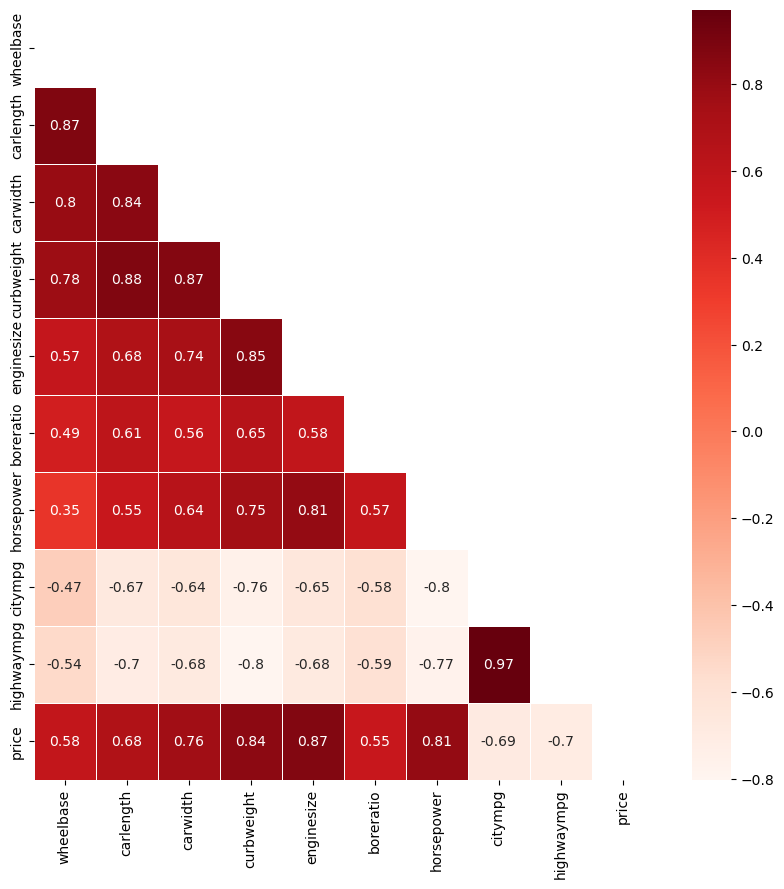

In [12]:
# lets see the correlation between eachother by using heatmap

df1=df1.drop(columns=['car_ID','peakrpm','symboling','compressionratio','stroke','carheight'])

fig, ax = plt.subplots(figsize=(10,10))
mask = np.triu(np.ones_like(df1.corr(),dtype=np.bool))
sns.heatmap(df1.corr(), annot=True, cmap="Reds", mask=mask, linewidth=0.5)

In [13]:
# Checking data missing values
missing = pd.DataFrame(df1.isnull().sum(),columns = ['No.of missing values'])

missing['% missing_values']= (missing/len(df1)).round(2)*100
missing

,No.of missing values,% missing_values
CarName,0,0.0
fueltype,0,0.0
aspiration,0,0.0
doornumber,0,0.0
carbody,0,0.0
drivewheel,0,0.0
enginelocation,0,0.0
wheelbase,0,0.0
carlength,0,0.0
carwidth,0,0.0


In [14]:
df1.shape

(205, 20)

# Label encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
# exrtact categorical features
cat_col=df1.select_dtypes(object).columns.tolist()
len(cat_col)

10

In [17]:
# Convert categorized values to numerical values
le = LabelEncoder()
df1[cat_col] =df1[cat_col].astype('str').apply(le.fit_transform)
df1


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,2,1,0,1,0,2,0,88.6,168.8,64.1,2548,0,2,130,5,3.47,111,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,2548,0,2,130,5,3.47,111,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,2823,5,3,152,5,2.68,154,19,26,16500.0
3,4,1,0,0,3,1,0,99.8,176.6,66.2,2337,3,2,109,5,3.19,102,24,30,13950.0
4,5,1,0,0,3,0,0,99.4,176.6,66.4,2824,3,1,136,5,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,139,1,0,0,3,2,0,109.1,188.8,68.9,2952,3,2,141,5,3.78,114,23,28,16845.0
201,138,1,1,0,3,2,0,109.1,188.8,68.8,3049,3,2,141,5,3.78,160,19,25,19045.0
202,140,1,0,0,3,2,0,109.1,188.8,68.9,3012,5,3,173,5,3.58,134,18,23,21485.0
203,142,0,1,0,3,2,0,109.1,188.8,68.9,3217,3,3,145,3,3.01,106,26,27,22470.0


# Multicollinearity

In [18]:
#Checking and highliting the variables which has high correletion
DF=df1.corr()
def highlight(s):
    return ['background-color: yellow' if (v>0.9) or (v<-0.9) else 'background-color: white' for v in s]
DF.style.apply(highlight, axis=0)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
CarName,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.014550,0.053016,-0.075349,-0.049407,-0.090381,0.047154,-0.153982,0.123845,0.188598,-0.092131,0.093437,0.102895,-0.231439
fueltype,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,-0.233880,-0.217275,0.082695,0.110617,-0.069594,0.041529,-0.054451,0.163926,-0.255963,-0.191392,-0.105679
aspiration,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,0.300567,0.324902,-0.102963,-0.133119,0.108217,0.288086,0.212614,0.241685,-0.202362,-0.254416,0.177926
doornumber,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,-0.398568,-0.207168,-0.197379,0.062431,0.154322,-0.020742,0.015519,-0.119258,0.126947,0.012417,0.036330,-0.031835
carbody,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,0.131710,0.128467,-0.037024,-0.048408,-0.073352,-0.065079,0.010549,-0.153928,0.031697,-0.007170,-0.083976
drivewheel,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,0.470751,0.575111,-0.116823,0.223238,0.524307,0.424686,0.481827,0.518686,-0.449581,-0.452220,0.577992
enginelocation,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,-0.051698,0.050468,0.114127,0.135541,0.196826,0.105971,0.185042,0.317839,-0.153487,-0.102026,0.324973
wheelbase,0.014550,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,0.795144,0.776386,-0.135577,-0.184596,0.569329,0.384601,0.488750,0.353294,-0.470414,-0.544082,0.577816
carlength,0.053016,-0.212679,0.234539,-0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,0.841118,0.877728,-0.113291,-0.109585,0.683360,0.557810,0.606454,0.552623,-0.670909,-0.704662,0.682920
carwidth,-0.075349,-0.233880,0.300567,-0.207168,0.131710,0.470751,-0.051698,0.795144,0.841118,1.000000,0.867032,0.012298,-0.194074,0.735433,0.521434,0.559150,0.640732,-0.642704,-0.677218,0.759325


In [19]:
# importing packages for checking VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [20]:
#Checking the High VIF values of columns
data = df1.drop(columns=['highwaympg'])
X = add_constant(data)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['features'] = X.columns
vif

,VIF,features
0,5447.323915,const
1,1.579298,CarName
2,3.030281,fueltype
3,2.143368,aspiration
4,2.319188,doornumber
5,2.579261,carbody
6,2.406034,drivewheel
7,1.934754,enginelocation
8,7.835269,wheelbase
9,11.009596,carlength


In [21]:
#Droping the column which has high VIF value
df1.drop('highwaympg',inplace=True,axis=1)
df1

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,price
0,2,1,0,1,0,2,0,88.6,168.8,64.1,2548,0,2,130,5,3.47,111,21,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,2548,0,2,130,5,3.47,111,21,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,2823,5,3,152,5,2.68,154,19,16500.0
3,4,1,0,0,3,1,0,99.8,176.6,66.2,2337,3,2,109,5,3.19,102,24,13950.0
4,5,1,0,0,3,0,0,99.4,176.6,66.4,2824,3,1,136,5,3.19,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,139,1,0,0,3,2,0,109.1,188.8,68.9,2952,3,2,141,5,3.78,114,23,16845.0
201,138,1,1,0,3,2,0,109.1,188.8,68.8,3049,3,2,141,5,3.78,160,19,19045.0
202,140,1,0,0,3,2,0,109.1,188.8,68.9,3012,5,3,173,5,3.58,134,18,21485.0
203,142,0,1,0,3,2,0,109.1,188.8,68.9,3217,3,3,145,3,3.01,106,26,22470.0


# Data Scaling

In [22]:
#Declaring independent variable 
y = df1['price']

#Declaring Target variable 
x = df1.drop(['price'], axis = 1)

In [23]:
# importing package 
from sklearn.preprocessing import StandardScaler

#fitting the model to standardlize the data
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [24]:
#Transforming the data
scaled_x = scaler.transform(x)

# Splitting the data

In [25]:
#importing the package
from sklearn.model_selection import train_test_split

# splitting the data into train and test
x_train,x_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.2, random_state = 47)

# Model : Linear regression

In [26]:
#importing the model package
from sklearn.linear_model import LinearRegression

#loading and fitting the model
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [27]:
#predicting using x_train
y_hat = reg.predict(x_train)

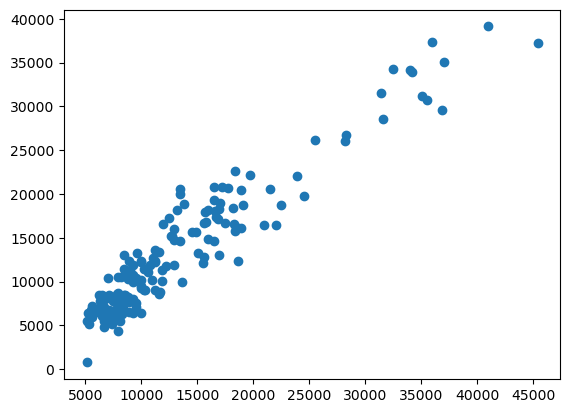

In [28]:
#Plotting y_train vs our predicted value(y_hat)
fig, ax = plt.subplots()
ax.scatter(y_train, y_hat)

In [29]:
#R2
reg.score(x_train, y_train)

0.9044784591536252

# Extreme Gradient Decent

In [34]:
#importing the EGD packages
from xgboost import XGBRegressor
from sklearn import metrics

In [35]:
# loading the model
model = XGBRegressor()

In [36]:
# training the model with X_train
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [37]:
# accuracy for prediction on training data
training_data_prediction = model.predict(x_train)

In [38]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)
print("R squared error : ", score_1)

R squared error :  0.9999993429276147


In [39]:
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)
print('Mean Absolute Error : ', score_2)

Mean Absolute Error :  4.383056640625
